In [1]:
import numpy as np
import sympy as sym
import os.path as path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import wget

In [2]:
file = 'InterpolacionNewtonNoequi.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

--File found---


In [3]:
Data = pd.read_csv(Path_,sep=',')

In [4]:
Data

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [5]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [6]:
Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y
for i in range(1,len(X)):
    for j in range(i,len(Y)):
        Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]
Diff

array([[-18.,   0.,   0.,   0.,   0.,   0.],
       [-13.,   5.,   0.,   0.,   0.,   0.],
       [  0.,  13.,   8.,   0.,   0.,   0.],
       [  5.,   5.,  -8., -16.,   0.,   0.],
       [  3.,  -2.,  -7.,   1.,  17.,   0.],
       [ 10.,   7.,   9.,  16.,  15.,  -2.]])

In [7]:
def NewtonGregory(X,Y,x):
    Sum_ = Y[0]
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y
    h = X[1] - X[0]  
    poly = 1.0
    for i in range(1,len(X)):
        poly *= ( x - X[i-1] )
        for j in range(i, len(X)):
            Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]   
        Sum_ += poly*(Diff[i,i])/(np.math.factorial(i)*h**(i))
    return Sum_,np.round(Diff,2)

In [8]:
x = np.linspace(np.min(X),np.max(X),500)
y,_ = NewtonGregory(X,Y,x)

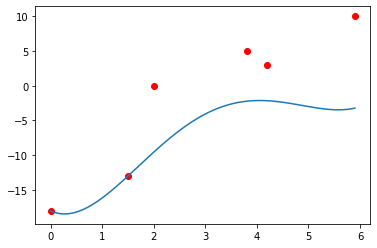

In [9]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)

In [10]:
x = sym.Symbol('x',Real='True')
y,_ = NewtonGregory(X,Y,x)
y

-0.00219478737997257*x*(x - 4.2)*(x - 3.8)*(x - 2.0)*(x - 1.5) + 0.139917695473251*x*(x - 3.8)*(x - 2.0)*(x - 1.5) - 0.790123456790123*x*(x - 2.0)*(x - 1.5) + 1.77777777777778*x*(x - 1.5) + 3.33333333333333*x - 18.0

In [11]:
y = y.simplify()
y

-0.00219478737997257*x**5 + 0.165157750342936*x**4 - 1.91458984910837*x**3 + 6.99914403292181*x**2 - 3.40385185185185*x - 18.0